Test PCA from built-in Wine Dataset of SkLearn

Model Implementation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
plt.style.use('fivethirtyeight')

# Load the wine dataset
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

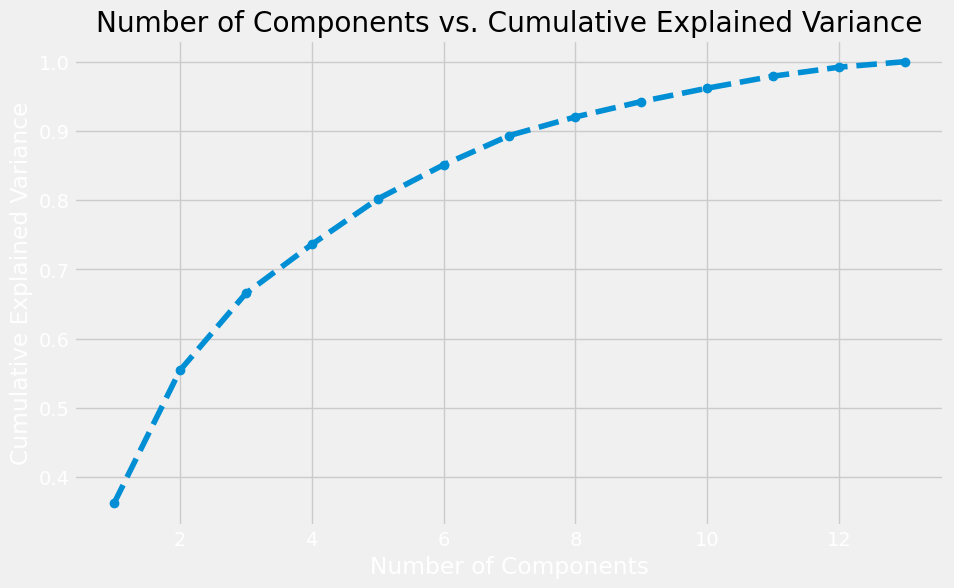

In [3]:
# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot
fig = plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Number of Components vs. Cumulative Explained Variance',color="black")
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

#Save Plot 
plot_1 = fig



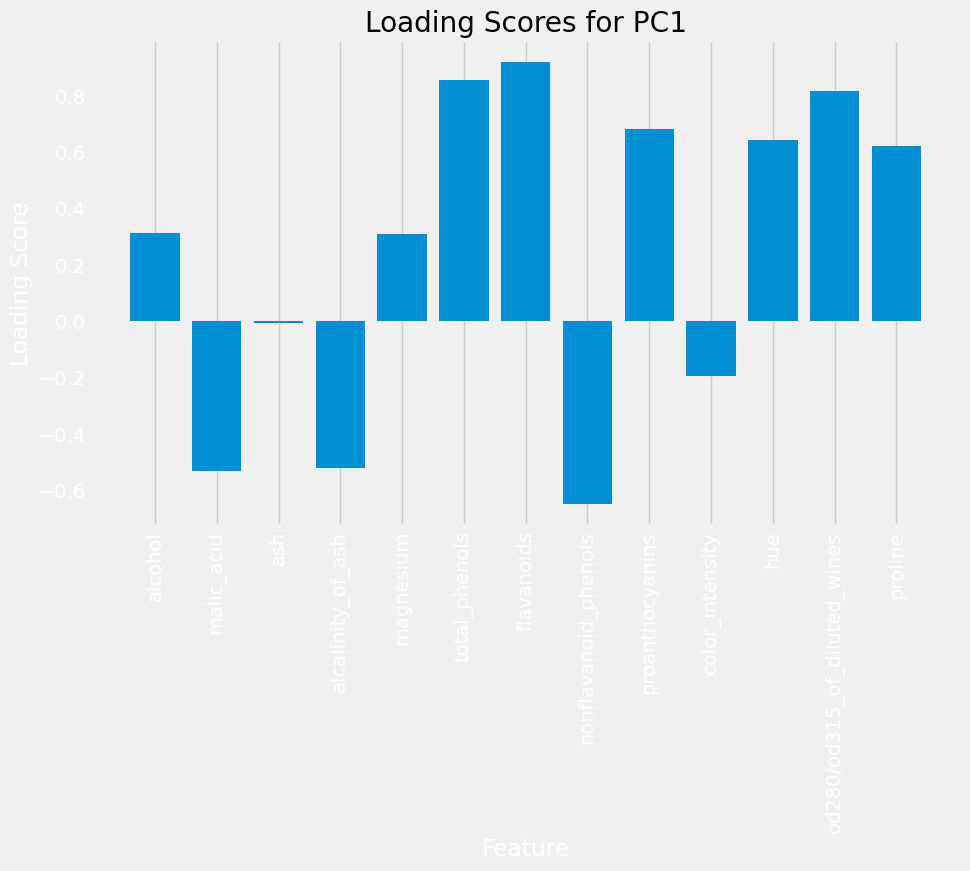

In [4]:
# Get the loading scores
loading_scores = pca.components_.T * np.sqrt(pca.explained_variance_)

# Plot
fig = plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_names)), loading_scores[:, 0], tick_label=feature_names)
plt.title('Loading Scores for PC1',color="black")
plt.xlabel('Feature')
plt.ylabel('Loading Score')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

# Save Plot
plot_2 = fig

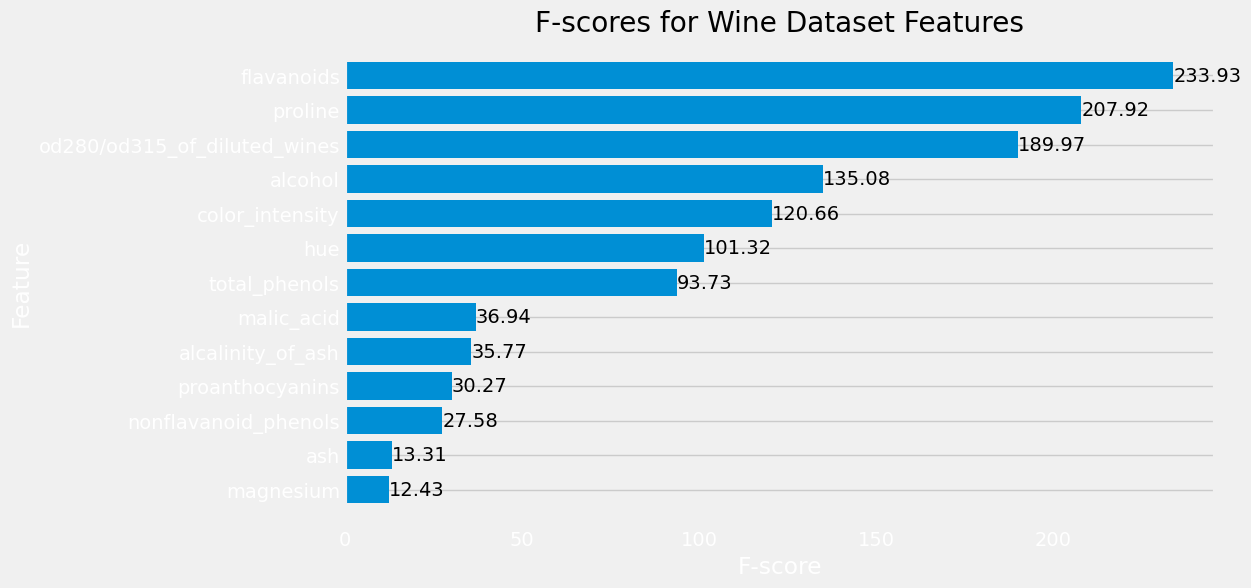

In [5]:
from sklearn.feature_selection import f_classif

# Calculate the F-scores for each feature
f_scores, _ = f_classif(X_scaled, y)

# Get the feature names sorted by F-score
sorted_indices = np.argsort(f_scores)[::-1]
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_f_scores = f_scores[sorted_indices]

# Plot
fig = plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_names)), sorted_f_scores, tick_label=sorted_feature_names)
plt.title('F-scores for Wine Dataset Features',color="black")
plt.xlabel('F-score')
plt.ylabel('Feature')
plt.grid(axis='x')

# Annotate bars with their F-score values
for i, score in enumerate(sorted_f_scores):
    plt.text(score + 0.01, i, f'{score:.2f}', va='center',color="black")

plt.gca().invert_yaxis()  # Invert y-axis to have the highest F-score at the top
plt.show()


#Save Plot
plot_3 = fig

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the wine dataset
data = load_wine()
X = data.data
feature_names = data.feature_names

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate the component loadings (vector lines)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

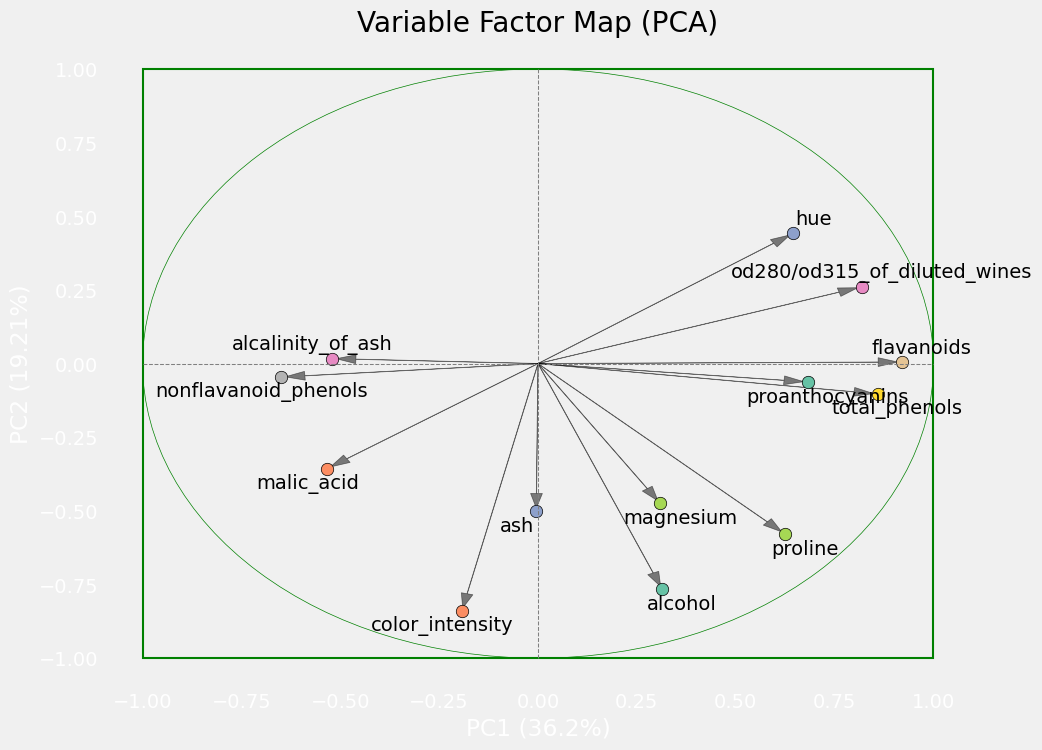

In [7]:
# Plot the variable factor map
palette = sns.color_palette("Set2", len(feature_names))

fig = plt.figure(figsize=(10, 8))

for i, (x, y) in enumerate(zip(loadings[:,0], loadings[:,1])):
    # Select color from the palette based on the index of feature
    color = palette[i % len(palette)]
     # Calculate arrow head coordinates
    arrow_length = 0.06  
    arrow_x = x - arrow_length * (x/np.sqrt(x**2 + y**2))
    arrow_y = y - arrow_length * (y/np.sqrt(x**2 + y**2))
    
    # Draw the arrow with pointer
    plt.arrow(0, 0, arrow_x, arrow_y, color="black", alpha=0.5, head_width=0.03, head_length=0.05)
    # Adjust the position of text labels based on the quadrant
    text_offset = 0.05  # Adjust this value as needed
    if x >= 0 and y >= 0:  # First quadrant
        text_x, text_y = x + text_offset, y + text_offset
    elif x < 0 and y >= 0:  # Second quadrant
        text_x, text_y = x - text_offset, y + text_offset
    elif x < 0 and y < 0:  # Third quadrant
        text_x, text_y = x - text_offset, y - text_offset
    else:  # Fourth quadrant
        text_x, text_y = x + text_offset, y - text_offset
    # Add text labels
    plt.scatter(x, y, color=color, marker='o', edgecolor='k', s=80)
    plt.text(text_x, text_y, feature_names[i], color='black', ha='center', va='center')


# Broken Line of the Coordinates
plt.hlines(0, -1, 1, linestyles='dashed', colors='gray',linewidth=0.75)
plt.vlines(0, -1, 1, linestyles='dashed', colors='gray',linewidth=0.75)


# Box and Circle Element
box_width = 2
box_height = 2
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='g')
box = plt.Rectangle((-1, -1), box_width, box_height, fill=False, edgecolor='g', linewidth=1.5)
plt.gca().add_patch(box)
plt.gca().add_artist(circle)



plt.xlim(-1.1, 1.1)  
plt.ylim(-1.1, 1.1)  
plt.xlabel('PC1 ({}%)'.format(round(pca.explained_variance_ratio_[0]*100, 2)))
plt.ylabel('PC2 ({}%)'.format(round(pca.explained_variance_ratio_[1]*100, 2)))
plt.title('Variable Factor Map (PCA)',color="black")
plt.grid()
plt.show()


# Save Plot
plot_4 = fig

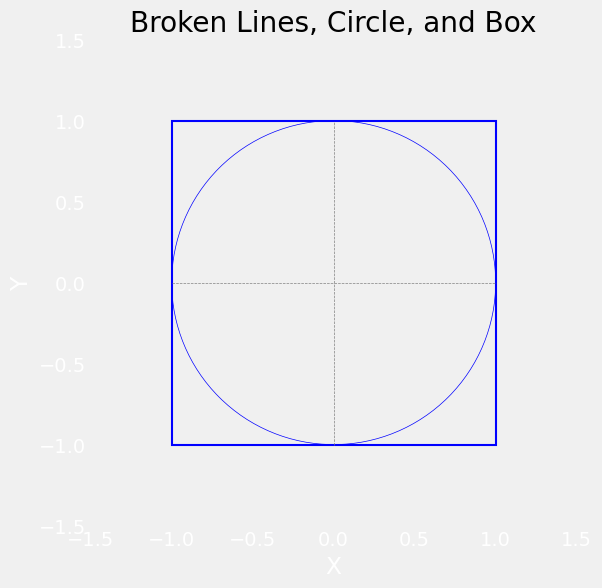

In [8]:
import matplotlib.pyplot as plt

# Plot the broken lines, circle, and box
plt.figure(figsize=(6, 6))

# Draw the circle
circle_radius = 1
circle = plt.Circle((0, 0), circle_radius, facecolor='none', edgecolor='b')
plt.gca().add_artist(circle)

# Adjust the size of the box to match the diameter of the circle
box_width = 2 * circle_radius
box_height = 2 * circle_radius

# Draw the box
box = plt.Rectangle((-circle_radius, -circle_radius), box_width, box_height, fill=False, edgecolor='b', linewidth=1.5)
plt.gca().add_patch(box)

# Draw broken lines across zero of each axis with thinner linewidth
plt.hlines(0, -circle_radius, circle_radius, linestyles='dashed', colors='gray', linewidth=0.5)
plt.vlines(0, -circle_radius, circle_radius, linestyles='dashed', colors='gray', linewidth=0.5)

plt.xlim(-1.5, 1.5)  # Adjust the limits for better visualization
plt.ylim(-1.5, 1.5)  # Adjust the limits for better visualization
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Broken Lines, Circle, and Box',color="black")
plt.grid()
plt.gca().set_aspect('equal', adjustable='box')  # Set aspect ratio to equal
plt.show()



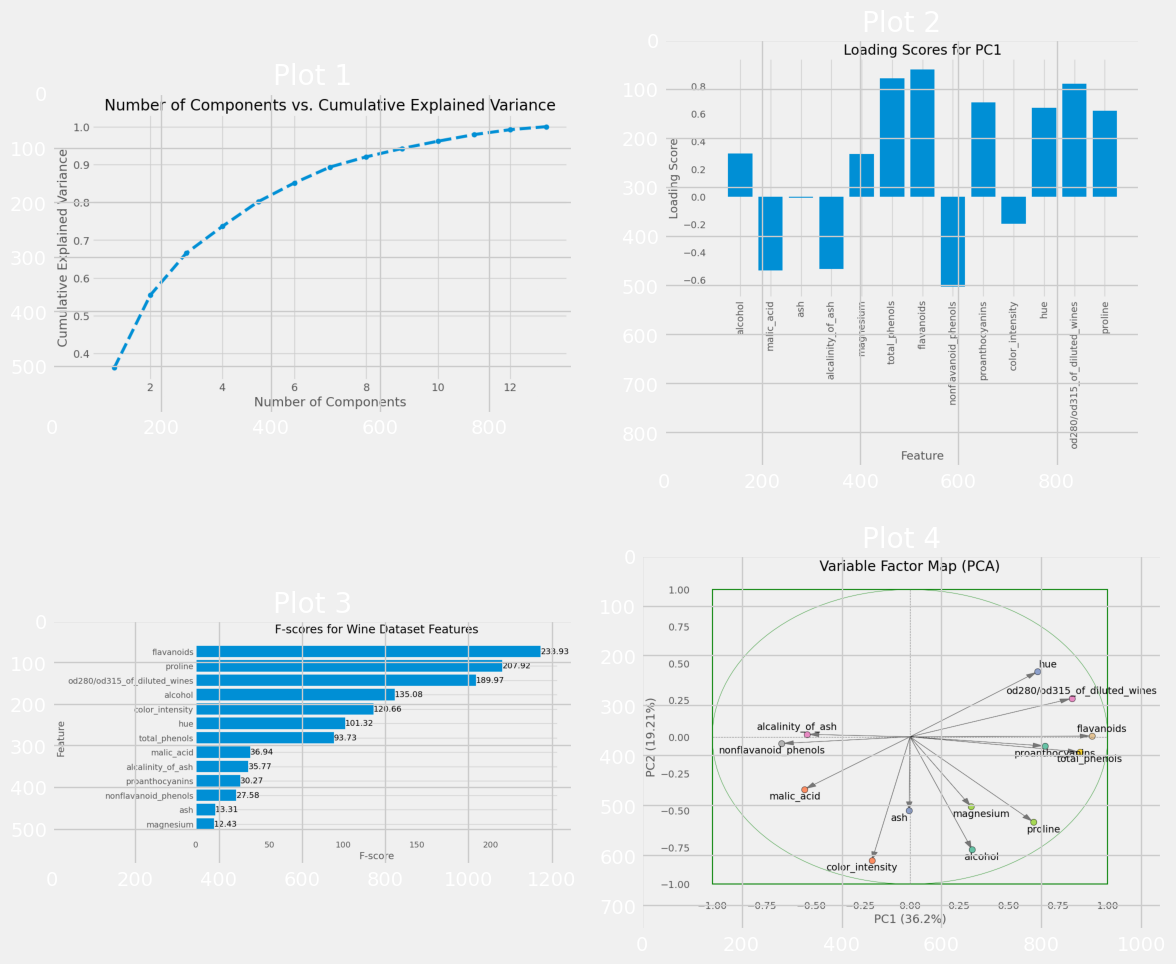

In [11]:
import matplotlib.image as mpimg

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1
image_1 = mpimg.imread("raw_plot/plot_1.png")
axs[0, 0].imshow(image_1)
axs[0, 0].set_title('Plot 1')
axs[0,0].axis('off')

# Plot 2
image_2 = mpimg.imread("raw_plot/plot_2.png")
axs[0, 1].imshow(image_2)
axs[0, 1].set_title('Plot 2')
axs[0,1].axis('off')

# Plot 3
image_3 = mpimg.imread("raw_plot/plot_3.png")
axs[1, 0].imshow(image_3)
axs[1, 0].set_title('Plot 3')
axs[1,0].axis('off')

# Plot 4
image_4 = mpimg.imread("raw_plot/plot_4.png")
axs[1, 1].imshow(image_4)
axs[1, 1].set_title('Plot 4')
axs[1,1].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()
